# Задание 1: изучение Python, NumPy

### Для каждой из задач:

1) Написать на Python + NumPy несколько вариантов кода различной эффективности. Один полностью векторизованный вариант (fast) и один вариант без векторизации (slow).

2) Сравнить в IPython при помощи %timeit скорость работы на нескольких тестовых наборах разного размера (минимум 3).

3) Проанализировать полученные данные о скорости работы разных реализаций.

In [1]:
import numpy as np

## Task 1
Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы. Для `X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])`, ответ: `3`

In [2]:
def get_nonzero_diagonal_product(X):
    res = 1
    for i in range(min(X.shape)):
        el = X[i, i]
        if el != 0:
            res *= el
    return res

In [3]:
def get_nonzero_diagonal_product_fast(X):
    diagonal = X.diagonal()
    nonzero_el = diagonal[diagonal.nonzero()]
    res = np.prod(nonzero_el)
    return res

In [4]:
X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])
Y = np.array([[1, 0, 1, 2, 3, 4, 2, 1, 3, 4, 0, 0], [2, 0, 2, 5, 6, 2, 9, 6, 1, 3, 0, 0], 
              [3, 5, 3, 8, 3, 5, 8, 1, 7, 5, 9, 8], [4, 7, 4, 3, 4, 5, 0, 7, 2, 2, 9, 0],
              [3, 0, 0, 4, 3, 5, 0, 1, 0, 5, 7, 5], [4, 4, 0, 3, 7, 4, 2, 7, 0, 0, 2, 5],
              [3, 4, 3, 8, 1, 0, 8, 1, 9, 4, 7, 3], [7, 2, 8, 3, 5, 0, 0, 5, 2, 3, 7, 9],
              [3, 0, 0, 7, 8, 5, 0, 1, 7, 5, 0, 5], [4, 1, 4, 3, 4, 5, 2, 0, 8, 4, 4, 3],
              [3, 0, 0, 7, 8, 5, 0, 1, 7, 5, 7, 2], [4, 1, 4, 3, 4, 5, 2, 0, 8, 7, 7, 4],
             ])
Z = np.random.randint(3, size=(60,50))

assert get_nonzero_diagonal_product(Z) == get_nonzero_diagonal_product_fast(Z)
print('slow')
%timeit get_nonzero_diagonal_product(Z)
print('fast')
%timeit get_nonzero_diagonal_product_fast(Z)

slow
48.8 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
fast
10.5 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Task 2
Дана матрица X и два вектора одинаковой длины `i_idx` и `j_idx`. Построить вектор `np.array([X[i_idx[0], j_idx[0]], X[i_idx[1], j_idx[1]], . . . , X[i_idx[N-1], j_idx[N-1]]])`. Для `X = np.array(range(4 * 5)).reshape(4, 5) + 1, i_idx = np.array([1, 3, 0, 2]), j_idx = np.array([0, 2, 3, 1])` ответ: `[6 18  4 12]`

In [24]:
def task_2(X, i_idx, j_idx):
    res = []
    for i in range(len(i_idx)):
        res.append(X[i_idx[i], j_idx[i]])
    res = np.array(res)
    return res

In [25]:
def task_2_fast(X, i_idx, j_idx):
    return X[i_idx, j_idx]

In [40]:
X = np.array(range(4 * 5)).reshape(4, 5) + 1
i_idx = np.array([1, 3, 0, 2])
j_idx = np.array([0, 2, 3, 1])

Y = np.random.randint(100, size=(500,500))
i_2 = np.random.randint(0, 500, 500)
j_2 = np.random.randint(0, 500, 500)

Z = np.random.randint(100, size=(50,50))
i_3 = np.random.randint(0, 50, 50)
j_3 = np.random.randint(0, 50, 50)

print('slow')
%timeit task_2(Y, i_2, j_2)
print('fast')
%timeit task_2_fast(Y, i_2, j_2)

slow
527 µs ± 72.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fast
14.9 µs ± 549 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Task 3

а) Даны два вектора `x` и `y`. Проверить, задают ли они одно и то же множество.

б) Даны два вектора `x` и `y`. Проверить, задают ли они одно и то же мультимножество. Для `x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2])` ответ `True`.

In [5]:
def equal_sets(x, y):
    return set(x.ravel()) == set(y.ravel())

In [6]:
def equal_sets_fast(x, y):
    return np.array_equal(np.unique(x), np.unique(y))

In [8]:
x = np.random.randn(1000, 1000)
y = np.random.randn(1000, 1000)

x_2 = np.random.randn(10, 10)
y_2 = np.random.randn(10, 10)

x_3 = np.random.randn(100, 100)
y_3 = np.random.randn(100, 100)

assert equal_sets(x_2, y_2) == equal_sets_fast(x_2, y_2)
print('slow')
%timeit equal_sets(x_2, y_2)
print('fast')
%timeit equal_sets_fast(x_2, y_2)

slow
47.8 µs ± 664 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
fast
31.7 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
from collections import Counter

def equal_multisets(x, y):
    return Counter(x.ravel()) == Counter(y.ravel())

In [18]:
def equal_multisets_fast(x, y):
    return np.array_equal(np.unique(x, return_counts=True), np.unique(y, return_counts=True))

In [19]:
x = np.array([1, 2, 2, 4])
y = np.array([4, 2, 1, 2, 5])

assert equal_multisets(x, y) == equal_multisets_fast(x, y)
print('slow')
%timeit equal_multisets(x, y)
print('fast')
%timeit equal_multisets_fast(x, y)

slow
17.5 µs ± 1.22 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
fast
78 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Task 4
Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для `x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])`, ответ: `5`. 

In [12]:
import sys

def task_4(x):
    max_el = min(x)
    for i in range(len(x) - 1):
        if x[i] == 0:
            max_el = max(x[i + 1], max_el)
    return max_el

In [13]:
def task_4_fast(x):
    idxs = np.where(x == 0)[0] + 1
    valid_idxs = idxs[idxs < len(x)]
    return np.max(x[valid_idxs])

In [16]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

y = np.random.randint(0, 10, 50)

z = np.random.randint(0, 10, 500)

assert task_4(z) == task_4_fast(z)
print('slow')
%timeit task_4(z)
print('fast')
%timeit task_4_fast(z)       

slow
312 µs ± 25.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fast
16.2 µs ± 171 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Task 5
Дан трёхмерный массив, содержащий изображение, размера (`height`, `width`, `numChannels`), а также вектор длины `numChannels`. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (`height`, `width`). Считать реальное изображение можно при помощи функции `imageio.imread` (установите пакет pillow: `conda install pillow`). Преобразуйте цветное изображение в оттенки серого, использовав коэффициенты `np.array([0.299, 0.587, 0.114])`. Для вывода используйте `matplotlib.pyplot.imshow`.

In [5]:
from imageio import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
im_arr = imread('roza.jpg')
print(im_arr.shape)

(3456, 4608, 3)


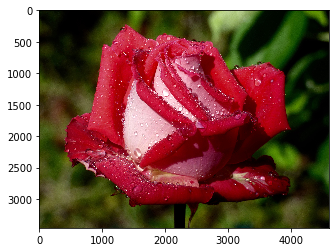

In [7]:
plt.imshow(im_arr);

In [8]:
def task_5_slow(im_arr):
    gray_arr = np.zeros((im_arr.shape[0], im_arr.shape[1]), dtype='float64')
    gray = np.array([0.299, 0.587, 0.114])
    for h in range(im_arr.shape[0]):
        for w in range(im_arr.shape[1]):
            for c in range(im_arr.shape[2]):
                gray_arr[h, w] += im_arr[h, w, c] * gray[c]
    return gray_arr

In [9]:
def task_5_fast(im_arr):
    gray = np.array([0.299, 0.587, 0.114])
    gray_arr = np.add.reduce(im_arr * gray, axis=2)
    return gray_arr

slow
5min 8s ± 27.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
fast
1.55 s ± 127 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


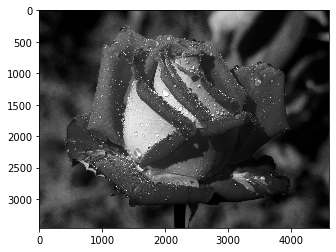

In [10]:
np.testing.assert_array_almost_equal(task_5_slow(im_arr), task_5_fast(im_arr))

print('slow')
%timeit task_5_slow(im_arr)
print('fast')
%timeit task_5_fast(im_arr)

gray_im_arr = task_5_fast(im_arr)
plt.imshow(gray_im_arr, cmap='gray')

## Task 6
Реализовать кодирование длин серий (Run-length encoding). Дан вектор `x`. Необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить. Пример: `x = np.array([2, 2, 2, 3, 3, 3, 5])`. Ответ: `(np.array([2, 3, 5]), np.array([3, 3, 1]))`

In [53]:
def task_6(x):
    if len(x) == 0:
        return np.array([]), np.array([])
    
    el = []
    count = []
    el.append(x[0])
    count.append(1)
    for i in range(len(x) - 1):
        if x[i] == x[i + 1]:
            count[-1] += 1
        else:
            el.append(x[i + 1])
            count.append(1)
    return np.array(el), np.array(count)

In [54]:
def task_6_fast(x):
    l = len(x)
    if l == 0: 
        return np.array([]), np.array([])
    else:
        y = np.array(x[1:] != x[:-1])
        i = np.append(np.where(y), l - 1)
        z = np.diff(np.append(-1, i))
        return(x[i], z)

In [57]:
x = np.tile(np.array([2, 2, 2, 3, 3, 3, 5]), 10)

y = np.tile(np.array([2, 2, 2, 3, 3, 3, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7]), 30)

z = np.tile(np.array([2, 2, 2, 3, 3, 3, 5]), 90)

pos_slow, len_slow = task_6(y)
pos_fast, len_fast = task_6_fast(y)

np.testing.assert_array_equal(pos_slow, pos_fast)
np.testing.assert_array_equal(len_slow, len_fast)

print('slow')
%timeit task_6(z)
print('fast')
%timeit task_6_fast(z)        

slow
541 µs ± 5.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
fast
37.1 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
